# Pre-processing Steps

<ol>1. Filling the missing values</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

In [75]:
# importing required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
# check version on pandas
print('Version of pandas:', pd.__version__)

Version of pandas: 1.4.4


In [77]:
# reading the bigmart sales data

# reading train data
df_train = pd.read_csv('../input/BigMart_Sales_Predictions/train.csv')

# reading test data
df_test = pd.read_csv('../input/BigMart_Sales_Predictions/test.csv')

# reading sample submission data
df_sample = pd.read_csv('../input/BigMart_Sales_Predictions/sample_submission.csv')

In [78]:
# looking at the first five rows of the train data
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [79]:
# shape of the train data
df_train.shape

(8523, 12)

In [80]:
# checking missing values in the train data
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [81]:
# data types of the variables
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [82]:
# looking at the first five rows of the test data
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [83]:
# shape of the test data
df_test.shape

(5681, 11)

In [84]:
# checking missing values in the test data
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [85]:
# data types of the variables
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

## 1. Filling the missing values

### Categorical Data: Mode

In [86]:
# filling missing values of categorical variables with mode in train data

df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

# filling missing values of categorical variables with mode in test data

df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

### Continuous Data: Mean

In [87]:
# filling missing values of continuous variables with mean in train data
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

# filling missing values of continuous variables with mean in test data
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

In [88]:
# checking missing values after imputation in train data
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [89]:
# checking missing values after imputation in test data
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## 2. Converting categories to numbers

In [90]:
# Let us import label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [91]:
# Let's create a column Item_Identifier_Initial from Item_Identifier column and drop Item_Identifier
df_train['Item_Identifier_Initial'] = df_train.Item_Identifier.str[:2]
df_train.drop(columns=['Item_Identifier'], inplace=True)
df_train['Item_Identifier_Initial'].value_counts()

df_test['Item_Identifier_Initial'] = df_test.Item_Identifier.str[:2]
df_test.drop(columns=['Item_Identifier'], inplace=True)
df_test['Item_Identifier_Initial'].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Identifier_Initial, dtype: int64

In [92]:
# converting the categories into numbers using label encoder in train data
df_train['Item_Fat_Content'] = label_encoder.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type'] = label_encoder.fit_transform(df_train['Item_Type'])
df_train['Outlet_Identifier'] = label_encoder.fit_transform(df_train['Outlet_Identifier'])
df_train['Outlet_Size'] = label_encoder.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type'] = label_encoder.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type'] = label_encoder.fit_transform(df_train['Outlet_Type'])
df_train['Item_Identifier_Initial'] = label_encoder.fit_transform(df_train['Item_Identifier_Initial'])

In [93]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Initial
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800,1
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2


In [94]:
# converting the categories into numbers using label encoder in test data
df_test['Item_Fat_Content'] = label_encoder.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type'] = label_encoder.fit_transform(df_test['Item_Type'])
df_test['Outlet_Identifier'] = label_encoder.fit_transform(df_test['Outlet_Identifier'])
df_test['Outlet_Size'] = label_encoder.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type'] = label_encoder.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type'] = label_encoder.fit_transform(df_test['Outlet_Type'])
df_test['Item_Identifier_Initial'] = label_encoder.fit_transform(df_test['Item_Identifier_Initial'])

## 3. Bringing all the variables in range 0 to 1

<img src='https://drive.google.com/uc?id=1Z7wN2BE8CDSYIJly5l0K9uqYdj9WUo3f'>

In [95]:
# applying for loop to bring all the variables in range 0 to 1
for i in df_train.columns:
    if i == 'Item_Outlet_Sales':
        continue
    df_train[i] = (df_train[i] - df_train[i].min()) / (df_train[i].max() - df_train[i].min())

for i in df_test.columns:
    df_test[i] = (df_test[i] - df_test[i].min()) / (df_test[i].max() - df_test[i].min())

In [96]:
# again looking at first five rows of pre-processed train data
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Initial
0,0.282525,0.25,0.048866,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,3735.1380,0.5
1,0.081274,0.50,0.058705,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,443.4228,0.0
2,0.770765,0.25,0.051037,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,2097.2700,0.5
3,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,732.3800,0.5
4,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,994.7052,1.0


In [143]:
df_train.Item_Outlet_Sales.min(), df_train.Item_Outlet_Sales.max()

(33.29, 13086.9648)

In [97]:
# again looking at first five rows of pre-processed test data
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Initial
0,0.964275,0.25,0.023374,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333,0.5
1,0.222983,1.00,0.118737,0.266667,0.235849,0.222222,0.916667,0.5,0.5,0.333333,0.5
2,0.598095,0.25,0.307674,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000,1.0
3,0.164335,0.25,0.047548,0.866667,0.524488,0.222222,0.916667,0.5,0.5,0.333333,0.5
4,0.484706,0.50,0.366458,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000,0.5


In [98]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = df_train.drop('Item_Outlet_Sales', axis=1)

# storing the dependent variable as y
y = df_train['Item_Outlet_Sales']

In [99]:
# shape of independent and dependent variables
X.shape, y.shape

((8523, 11), (8523,))

In [100]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)

In [101]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((6818, 11), (6818,)), ((1705, 11), (1705,)))

## 4. Defining the architecture of the model

In [102]:
# !pip install daal==2021.4.0
# !pip install tensorflow
# !pip install keras
# !pip install numpy

In [103]:
# checking the version of keras
import keras
print(keras.__version__)

2.12.0


In [104]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


### a. Create a model

In [105]:
# importing the sequential model
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor

In [106]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

In [107]:
# number of input neurons
X_train.shape

(6818, 11)

In [108]:
# number of features in the data
X_train.shape[1]

11

In [109]:
# defining input neurons
input_neurons = X_train.shape[1]

In [110]:
# number of output neurons

# since sales prediction is a regression problem, we will have single neuron in the output layer 

In [111]:
# define number of output neurons
output_neurons = 1

In [112]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [113]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [114]:
# activation function of different layers

# Let's choose relu as an activation function for hidden layers
# Since it is a regression problem, we will use linear as an activation function in the output layer

In [115]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons, )))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

In [116]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling the model (defining loss function, optimizer)

In [117]:
# compiling the model

# Since it is a regression problem, we will use mean squared error as loss function

# we will use adam as an optimizer

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

## 6. Training the model

In [118]:
# Let's train the model for 100 epochs
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
214/214 [==============================] - 1s 3ms/step - loss: 7605303.5000 - mean_squared_error: 7605303.5000 - val_loss: 7769589.5000 - val_mean_squared_error: 7769589.5000
Epoch 2/100
214/214 [==============================] - 0s 2ms/step - loss: 7477746.0000 - mean_squared_error: 7477746.0000 - val_loss: 7545104.0000 - val_mean_squared_error: 7545104.0000
Epoch 3/100
214/214 [==============================] - 0s 2ms/step - loss: 7129448.0000 - mean_squared_error: 7129448.0000 - val_loss: 7047725.5000 - val_mean_squared_error: 7047725.5000
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 6497296.0000 - mean_squared_error: 6497296.0000 - val_loss: 6263013.0000 - val_mean_squared_error: 6263013.0000
Epoch 5/100
214/214 [==============================] - 0s 2ms/step - loss: 5616016.5000 - mean_squared_error: 5616016.5000 - val_loss: 5280497.0000 - val_mean_squared_error: 5280497.0000
Epoch 6/100
214/214 [==============================] - 1s 3ms/ste

## 7. Evaluating model performance on validation set

In [134]:
# getting predictions for the validation set
prediction = model.predict(X_test)

54/54 [==============================] - 0s 2ms/step


In [136]:
# calculating the accuracy on validation set
np.sqrt(mean_squared_error(y_test, prediction))

1185.1716327438328

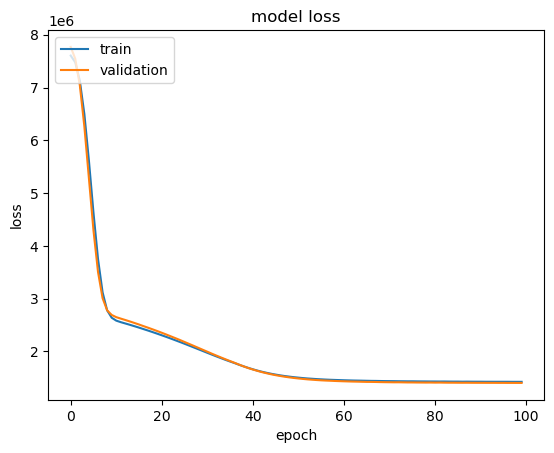

In [137]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

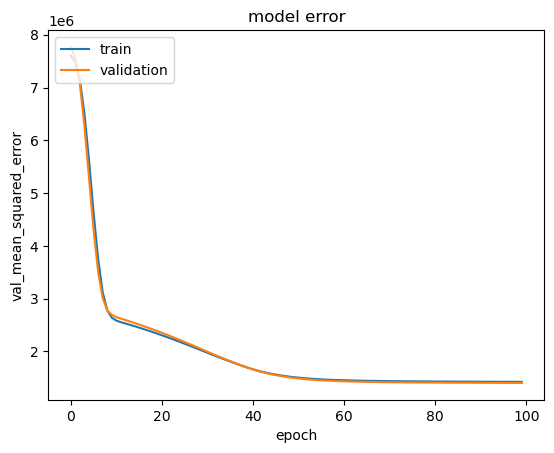

In [138]:
# summarize history for accuracy
plt.plot(model_history.history['mean_squared_error'])
plt.plot(model_history.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('val_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [139]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Initial
0,0.964275,0.25,0.023374,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333,0.5
1,0.222983,1.00,0.118737,0.266667,0.235849,0.222222,0.916667,0.5,0.5,0.333333,0.5
2,0.598095,0.25,0.307674,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000,1.0
3,0.164335,0.25,0.047548,0.866667,0.524488,0.222222,0.916667,0.5,0.5,0.333333,0.5
4,0.484706,0.50,0.366458,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000,0.5


In [197]:
# Lets make predictions on the test dataset
prediction = model.predict(df_test)

178/178 [==============================] - 0s 1ms/step


In [198]:
prediction = abs(prediction)

In [199]:
prediction.min(), prediction.max()

(1.6121657, 5666.781)

In [200]:
# creating a dataframe for submission
df_sumission = pd.read_csv('../input/BigMart_Sales_Predictions/test.csv')

In [201]:
df_sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [202]:
df_sumission = df_sumission[['Item_Identifier', 'Outlet_Identifier']]
df_sumission.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [203]:
df_sumission['Item_Outlet_Sales'] = prediction

In [204]:
# Let's save the submission file
df_sumission.to_csv('submission.csv', index=False)